In [1]:
from utils.filters import MadgDotFilter,MadgwickAHRSAB
from utils.file import list_hdf5_files
from utils.error_metrics import quaternion_absolute_distance
import numpy as np
from broad.example_code.broad_utils import quatFromAccMag
from pyquaternion import Quaternion
from ahrs.filters import Madgwick
import matplotlib.pyplot as plt
import h5py

In [2]:
folderpath ='broad/data_hdf5'
trials = list_hdf5_files(folderpath)

Filename: 01_undisturbed_slow_rotation_A.hdf5, AB error: 0.7633619254428752, Madgwick error: 0.7962530181794916


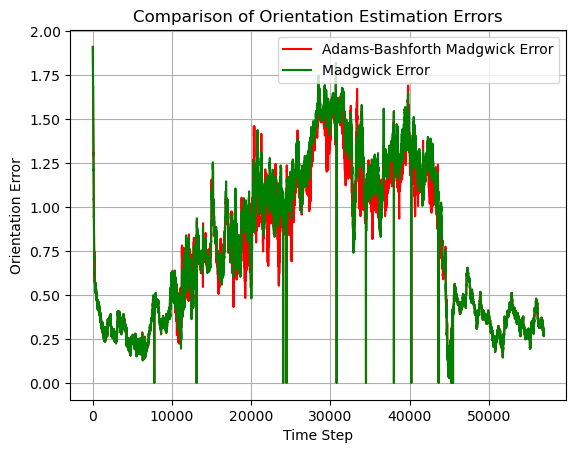

Filename: 02_undisturbed_slow_rotation_B.hdf5, AB error: 0.5612518807591718, Madgwick error: 0.5452395209941003


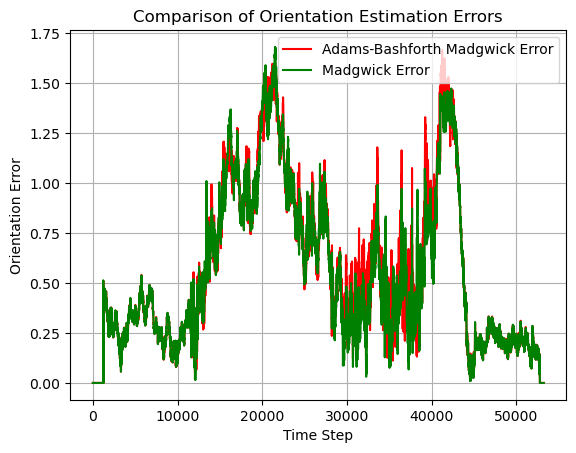

Filename: 03_undisturbed_slow_rotation_C.hdf5, AB error: 0.7046636985640081, Madgwick error: 0.6949648388591854


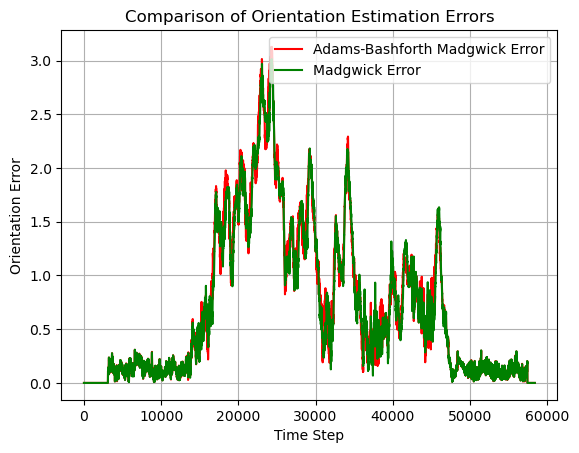

Filename: 04_undisturbed_slow_rotation_with_breaks_A.hdf5, AB error: 0.7036314023655796, Madgwick error: 0.6954157622324626


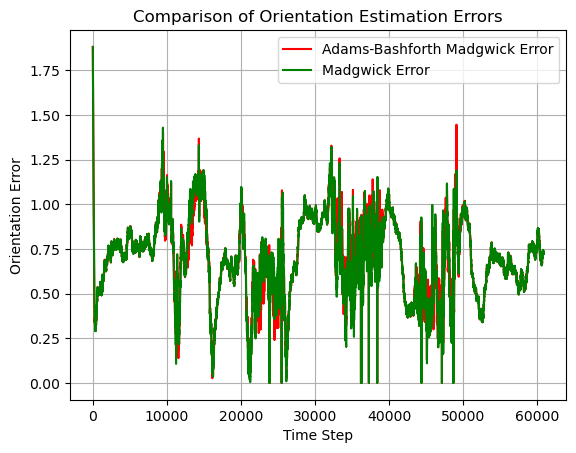

Filename: 05_undisturbed_slow_rotation_with_breaks_B.hdf5, AB error: 0.5594226791591952, Madgwick error: 0.5552653298579624


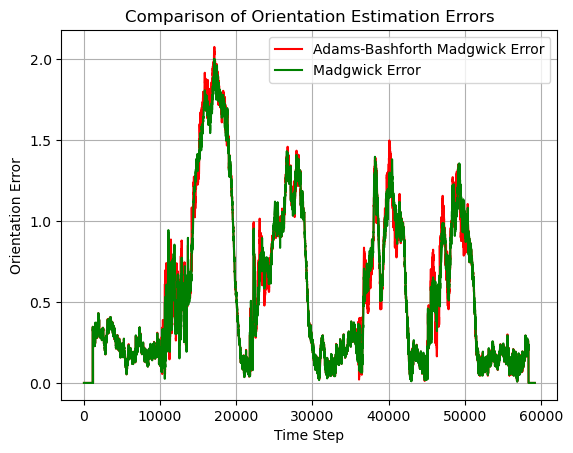

Filename: 06_undisturbed_fast_rotation_A.hdf5, AB error: 1.1835371323143478, Madgwick error: 1.171035708774648


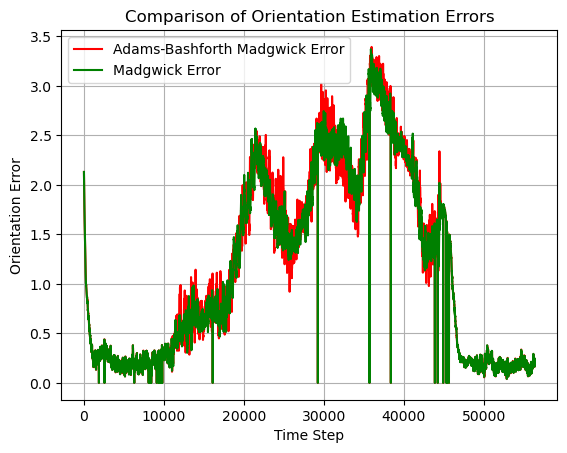

Filename: 07_undisturbed_fast_rotation_B.hdf5, AB error: 2.3262348920825455, Madgwick error: 2.303086758280817


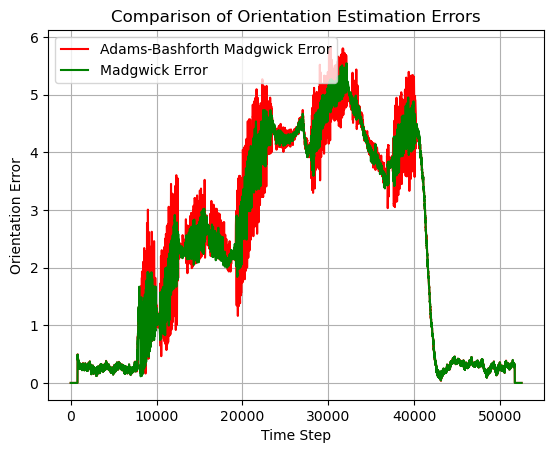

Filename: 08_undisturbed_fast_rotation_with_breaks_A.hdf5, AB error: 1.9099476577906662, Madgwick error: 1.8201750486890367


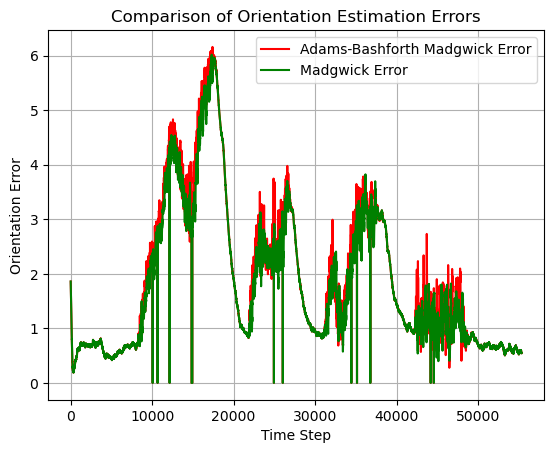

Filename: 09_undisturbed_fast_rotation_with_breaks_B.hdf5, AB error: 0.8414353469848508, Madgwick error: 0.7899264814829705


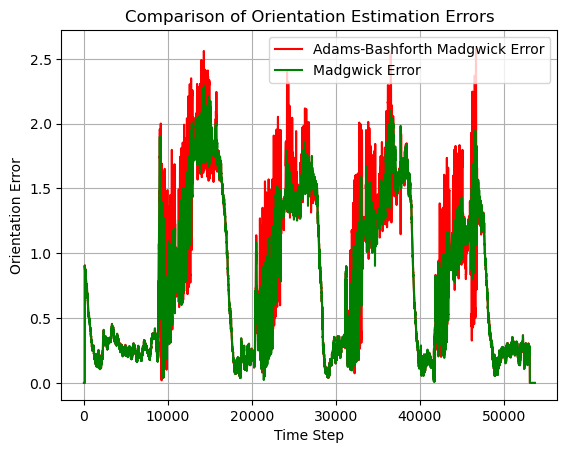

Filename: 10_undisturbed_slow_translation_A.hdf5, AB error: 0.5391098632305522, Madgwick error: 0.544776622463502


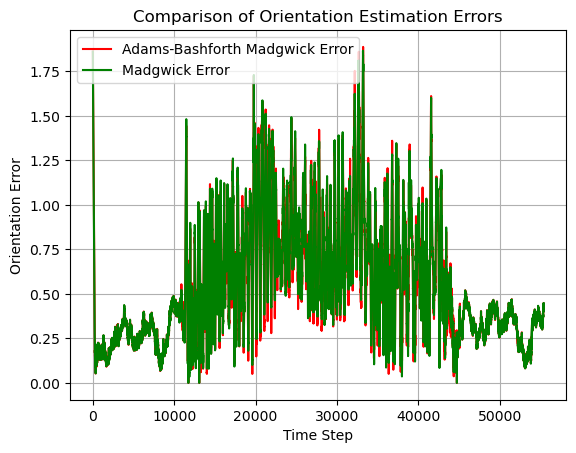

Filename: 11_undisturbed_slow_translation_B.hdf5, AB error: 1.4237249502926201, Madgwick error: 1.42496627715064


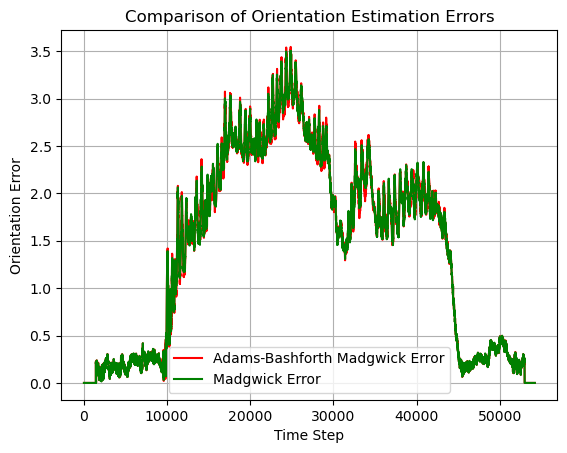

Filename: 12_undisturbed_slow_translation_C.hdf5, AB error: 0.995188394748301, Madgwick error: 0.9967978067941762


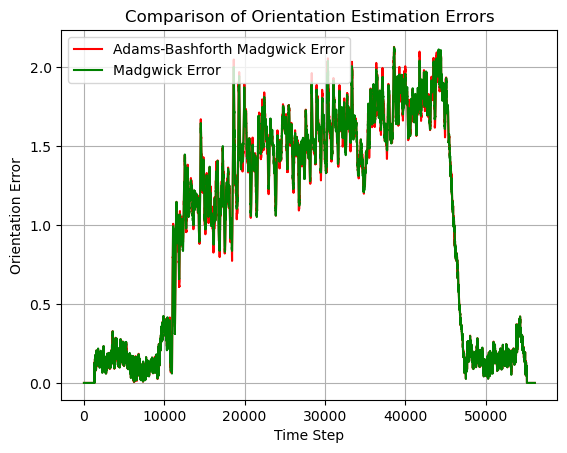

Filename: 13_undisturbed_slow_translation_with_breaks_A.hdf5, AB error: 0.833359798767856, Madgwick error: 0.8332223870642946


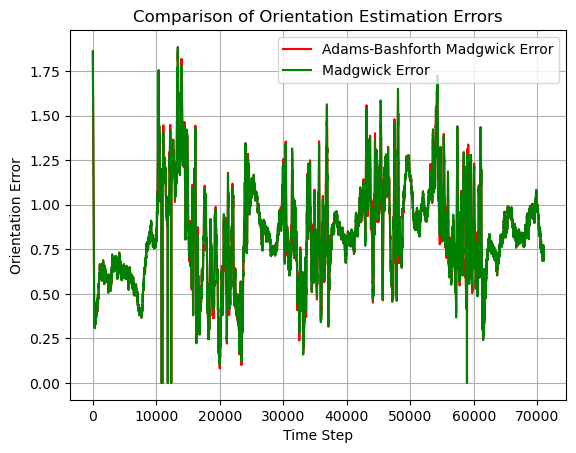

Filename: 14_undisturbed_slow_translation_with_breaks_B.hdf5, AB error: 0.5856121765231892, Madgwick error: 0.5864235414616208


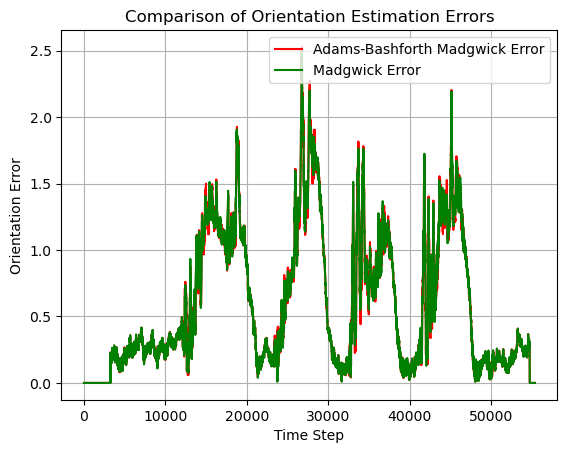

Filename: 15_undisturbed_fast_translation_A.hdf5, AB error: 5.950412376858947, Madgwick error: 5.95028273165786


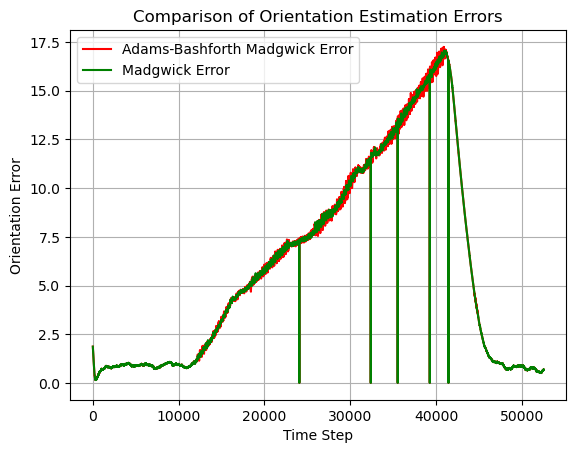

Filename: 16_undisturbed_fast_translation_B.hdf5, AB error: 2.8319186724415277, Madgwick error: 2.8304687805312065


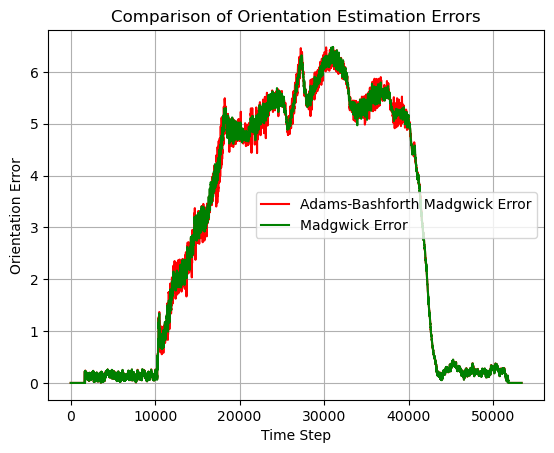

Filename: 17_undisturbed_fast_translation_with_breaks_A.hdf5, AB error: 2.703167296323548, Madgwick error: 2.7019095542954665


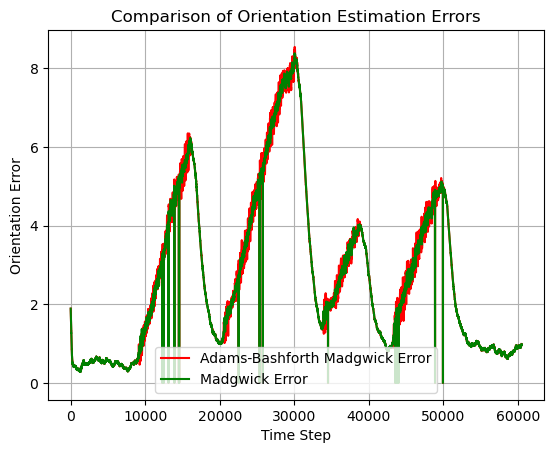

Filename: 18_undisturbed_fast_translation_with_breaks_B.hdf5, AB error: 1.172171323124865, Madgwick error: 1.1728087597881325


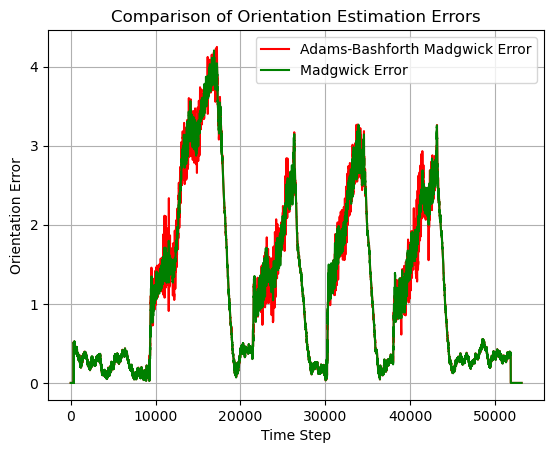

Filename: 19_undisturbed_slow_combined_240s.hdf5, AB error: 0.8656303540177192, Madgwick error: 0.8671843896742458


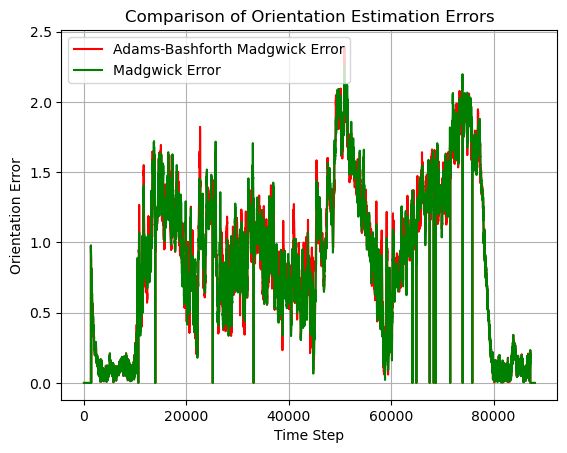

Filename: 20_undisturbed_slow_combined_360s.hdf5, AB error: 0.7460250982810066, Madgwick error: 0.7396943045817301


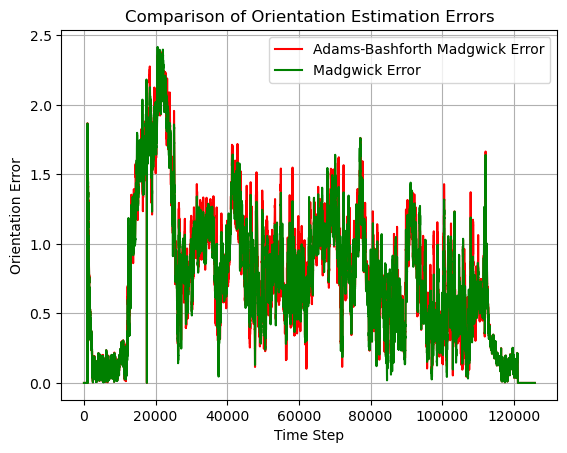

Filename: 21_undisturbed_fast_combined.hdf5, AB error: 2.1338593983772927, Madgwick error: 2.0759052646425395


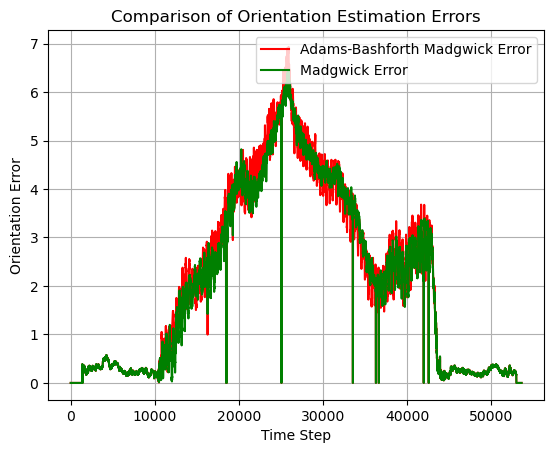

Filename: 22_undisturbed_fast_combined_240s.hdf5, AB error: 3.8628653606664236, Madgwick error: 3.8676603400653233


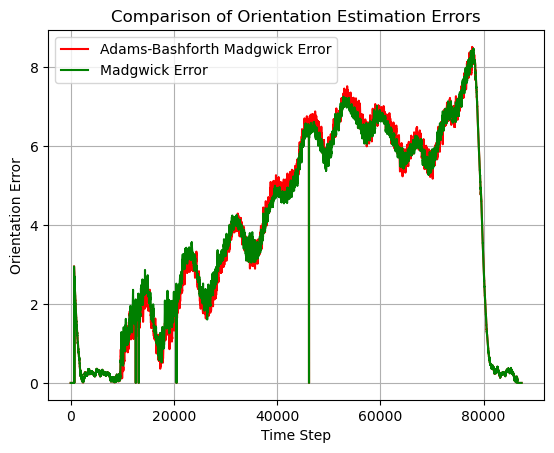

Filename: 23_undisturbed_fast_combined_360s.hdf5, AB error: 5.369067172919037, Madgwick error: 5.368163757112389


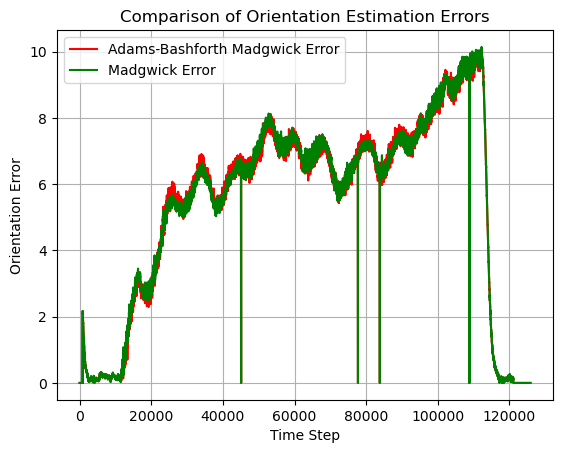

Filename: 24_disturbed_tapping_A.hdf5, AB error: 0.5672566213132761, Madgwick error: 0.5596828509086795


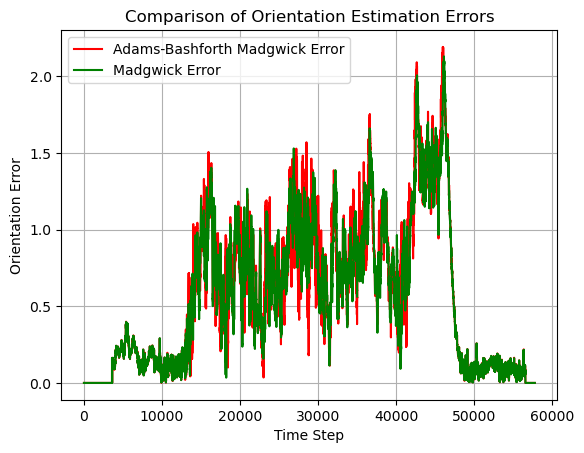

Filename: 25_disturbed_tapping_B.hdf5, AB error: 1.1784173589287958, Madgwick error: 1.1800860124110661


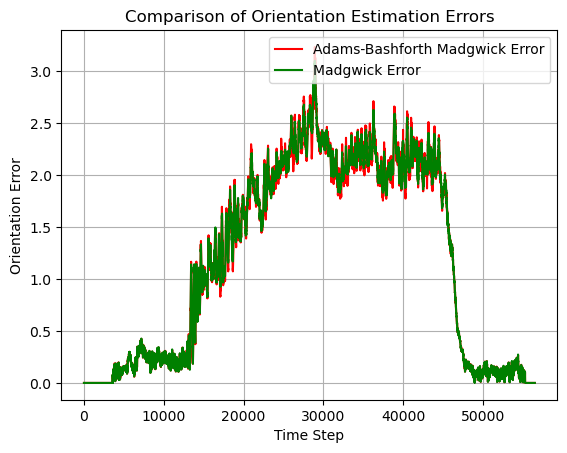

Filename: 26_disturbed_phone_vibration_A.hdf5, AB error: 2.5031039459871796, Madgwick error: 2.498910976425244


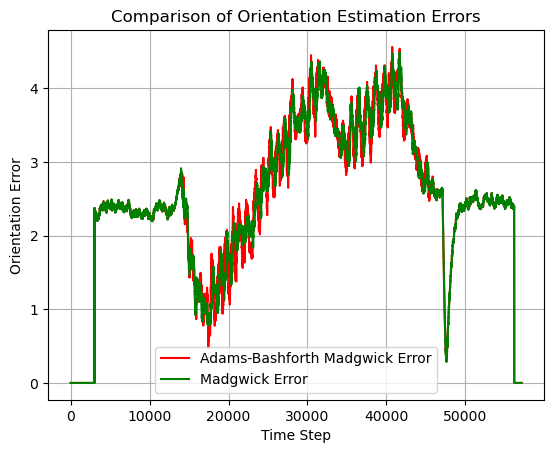

Filename: 27_disturbed_phone_vibration_B.hdf5, AB error: 4.279980213453267, Madgwick error: 4.280213415822483


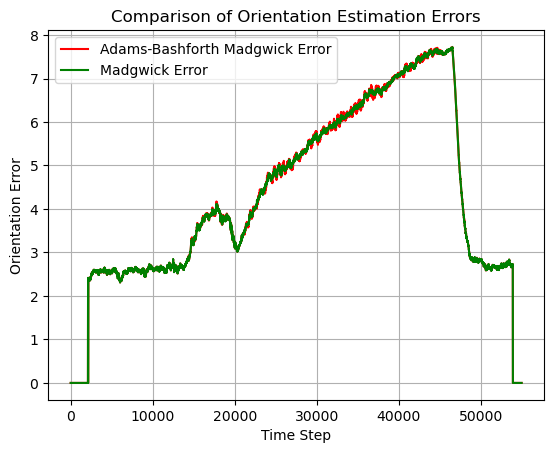

Filename: 28_disturbed_stationary_magnet_A.hdf5, AB error: 1.4501630703791535, Madgwick error: 1.3583403092755737


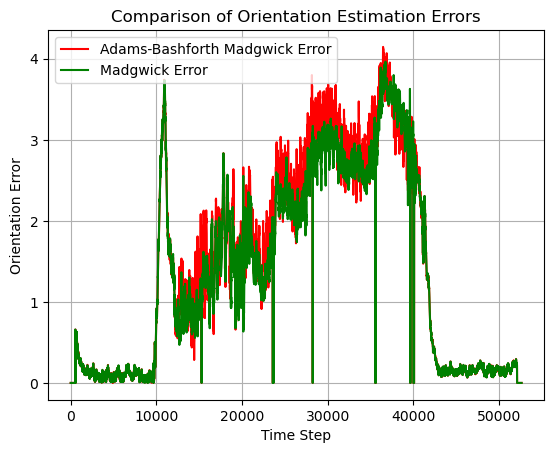

Filename: 29_disturbed_stationary_magnet_B.hdf5, AB error: 1.4602413864976176, Madgwick error: 1.4489699066120478


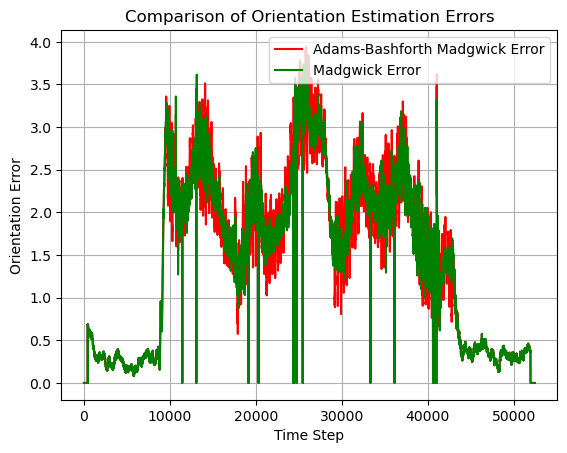

Filename: 30_disturbed_stationary_magnet_C.hdf5, AB error: 1.1341780327478714, Madgwick error: 1.1346667249965072


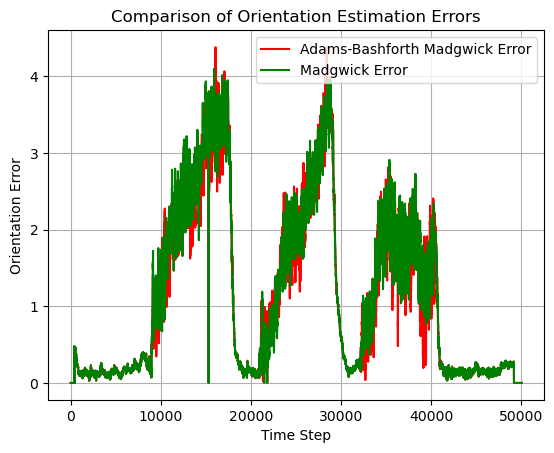

Filename: 31_disturbed_stationary_magnet_D.hdf5, AB error: 0.6706009549635099, Madgwick error: 0.6952594338004903


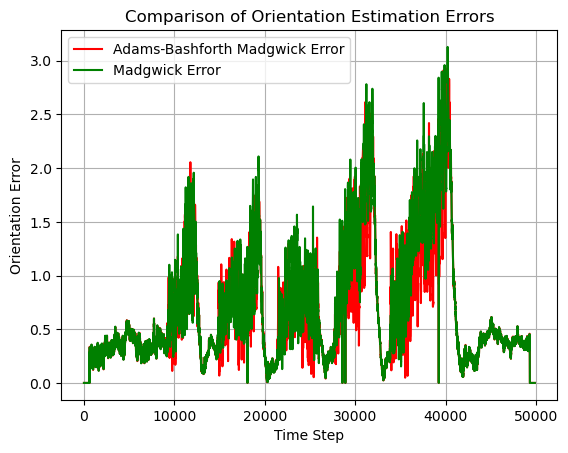

Filename: 32_disturbed_attached_magnet_1cm.hdf5, AB error: 3.4095335037236962, Madgwick error: 3.418055773708748


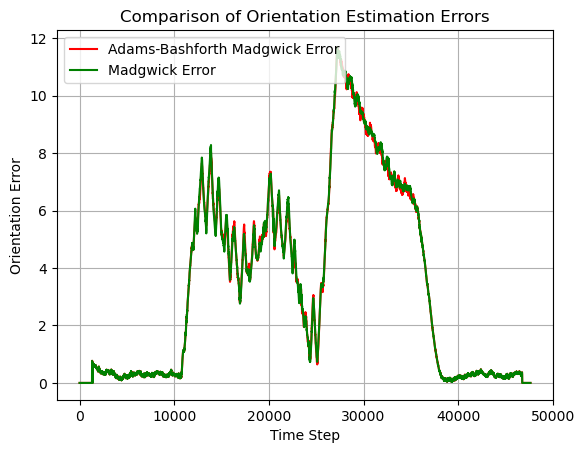

Filename: 33_disturbed_attached_magnet_2cm.hdf5, AB error: 2.306580967316806, Madgwick error: 2.3125530580389673


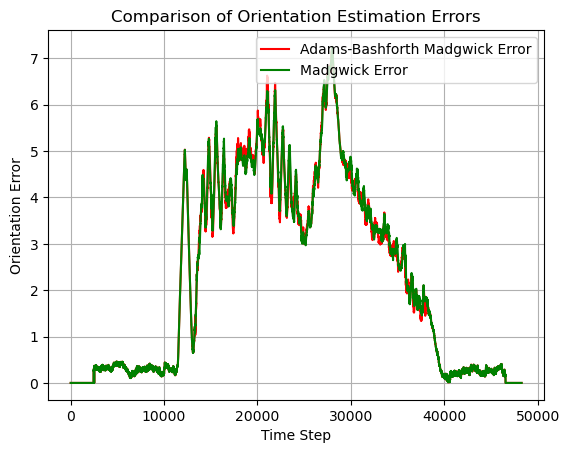

Filename: 34_disturbed_attached_magnet_3cm.hdf5, AB error: 2.0085699392724354, Madgwick error: 2.002632293207939


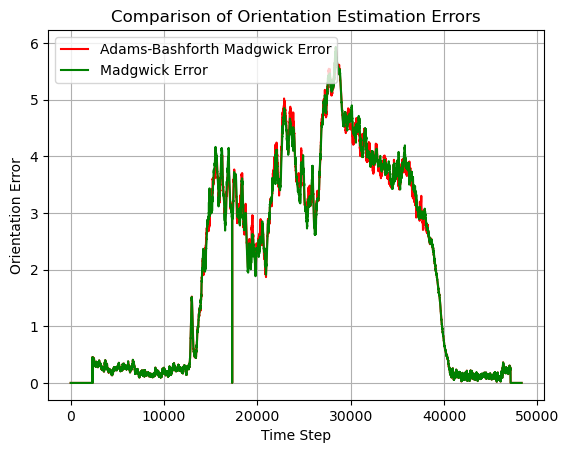

Filename: 35_disturbed_attached_magnet_4cm.hdf5, AB error: 0.9807771961779486, Madgwick error: 1.0113245314939008


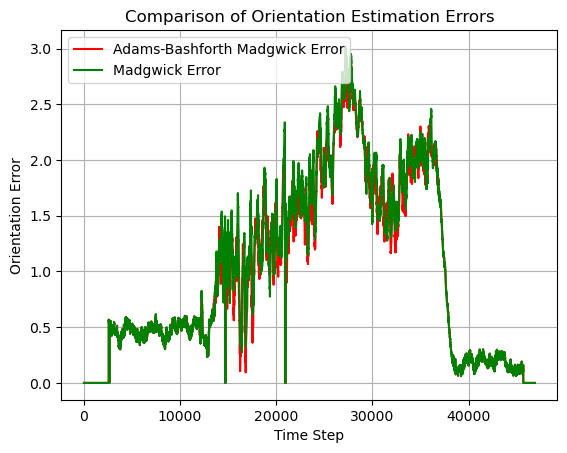

Filename: 36_disturbed_attached_magnet_5cm.hdf5, AB error: 1.285779966548127, Madgwick error: 1.3239328470965346


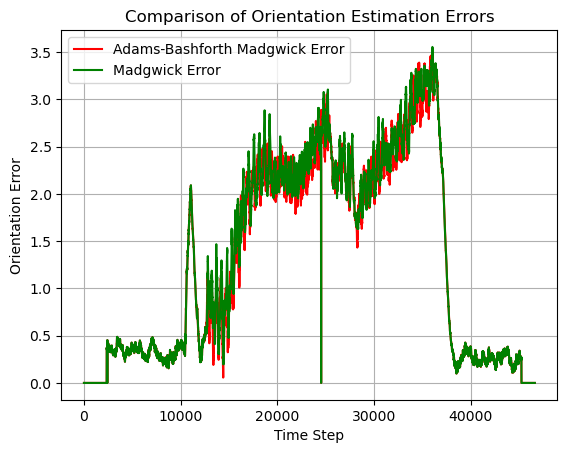

Filename: 37_disturbed_office_A.hdf5, AB error: 1.924065793547132, Madgwick error: 1.9508279691050983


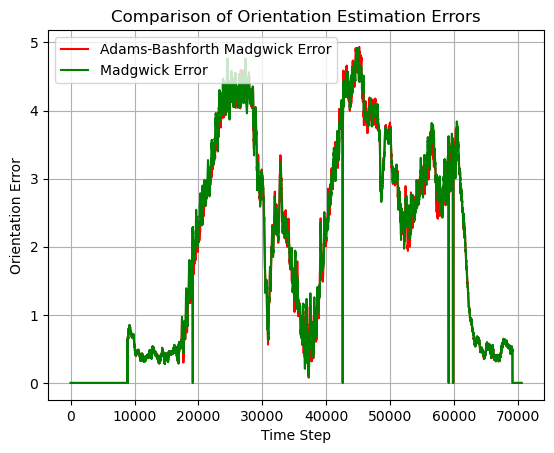

Filename: 38_disturbed_office_B.hdf5, AB error: 2.5958798542727495, Madgwick error: 2.619287367589554


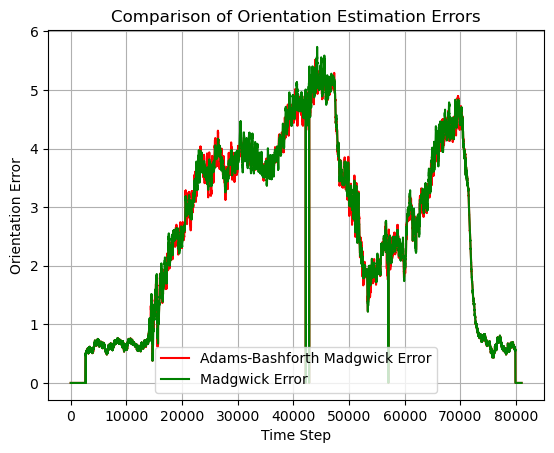

Filename: 39_disturbed_mixed.hdf5, AB error: 0.7826557554914917, Madgwick error: 0.7691257139229343


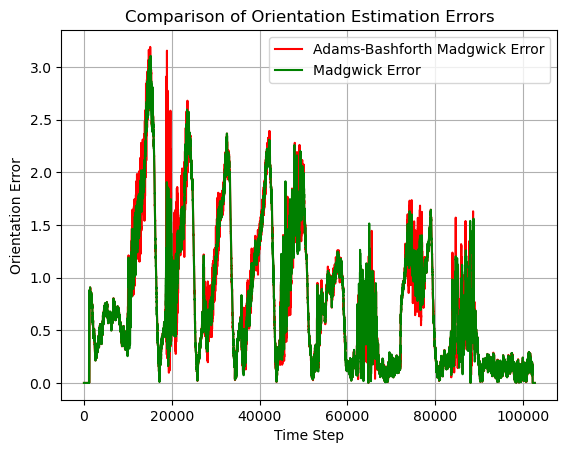

In [3]:
for file_name in trials:
    with h5py.File(folderpath + '/' + file_name, 'r') as recording:
        gyr = recording['imu_gyr'][:]
        acc = recording['imu_acc'][:]
        mag = recording['imu_mag'][:]
        quat_gt = recording['opt_quat'][:]
        sampling_rate = recording.attrs['sampling_rate']
        delta = 1/sampling_rate
        
        # filter = MadgDotFilter(gyr,acc,mag,delta=delta,beta=2)
        q0  = Quaternion(
            quatFromAccMag(np.mean(acc[0:1000], axis=0),np.mean(mag[0:1000], axis=0))
        )
        filter = MadgwickAHRSAB(sample_period=delta,beta=0.041,q0=q0)
        ans = filter.filter_batch(gyr,acc,mag,degree=1)
        madg = Madgwick(gyr,acc,mag,frequency=sampling_rate,q0=q0.elements)
        

        errors_AB = quaternion_absolute_distance(ans, quat_gt,rotate_frame=True)
        errors_madg = quaternion_absolute_distance(madg.Q, quat_gt,rotate_frame=True)
        
        
        print(f'Filename: {file_name}, AB error: {np.mean(errors_AB)}, Madgwick error: {np.mean(errors_madg)}')
        
        plt.plot(errors_AB, color='red', label='Adams-Bashforth Madgwick Error')
        plt.plot(errors_madg, color='green', label='Madgwick Error')

        
        
        plt.xlabel('Time Step')
        plt.ylabel('Orientation Error')
        plt.title('Comparison of Orientation Estimation Errors')
        plt.legend()
        plt.grid(True)  # Optional: adds grid for better readability
        plt.show()

        

        